# Generating predictions for model

In [87]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the pre-trained model

In [88]:
model1 = YOLO('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\last.pt')

In [92]:
categories = ['bottle-blue', 'bottle-green', 'bottle-dark', 'bottle-milk', 'bottle-transp', 'bottle-multicolor', 'bottle-yogurt', 'bottle-oil', 'cans', 'juice-cardboard', 
'milk-cardboard', 'detergent-color', 'detergent-transparent', 'detergent-box', 'canister', 'bottle-blue-full', 'bottle-transp-full', 'bottle-dark-full', 
'bottle-green-full', 'bottle-multicolorv-full', 'bottle-milk-full', 'bottle-oil-full', 'detergent-white', 'bottle-blue5l', 'bottle-blue5l-full', 'glass-transp', 
'glass-dark', 'glass-green']

# Checking the predictions on each image

In [99]:
items = np.zeros(len(categories))
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo_2_test_25-Mar_11-11-23.jpg'
results = model1.predict(img)
for r in results:
        # print("r",r)
        for c in r.boxes.cls:
            print("c",c)
            print(model1.names[int(c)])
            items[int(c)] += 1
print(items)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo_2_test_25-Mar_11-11-23.jpg: 1088x1920 1 cans, 1 detergent-box, 1 bottle-milk-full, 1150.7ms
Speed: 56.7ms preprocess, 1150.7ms inference, 4.5ms postprocess per image at shape (1, 3, 1920, 1920)


c tensor(13.)
detergent-box
c tensor(8.)
cans
c tensor(20.)
bottle-milk-full
[          0           0           0           0           0           0           0           0           1           0           0           0           0           1           0           0           0           0           0           0           1           0           0           0           0           0
           0           0]


# Code to show bounding boxes on images

In [89]:
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo_2_test_25-Mar_11-11-23.jpg'
results = model1(img, save=True)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo_2_test_25-Mar_11-11-23.jpg: 1088x1920 1 cans, 1 detergent-box, 1 bottle-milk-full, 2317.3ms
Speed: 53.3ms preprocess, 2317.3ms inference, 26.0ms postprocess per image at shape (1, 3, 1920, 1920)
Results saved to runs\detect\predict3


# Checking predictions on entire test data

In [100]:
train_path = "D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Dataset\\Warp-D\\train\\images"
test_path = "D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Dataset\\Warp-D\\test\\images"

In [108]:
lst = []
import os
for i in os.listdir(test_path):
    items = np.zeros(len(categories))
    results = model1.predict(os.path.join(test_path,i))
    for r in results:
            # print("r",r)
            for c in r.boxes.cls:
                # print("c",c)
                # print(model1.names[int(c)])
                items[int(c)] += 1
    # append image name and items list to lst
    items = items.tolist()
    items.insert(0,i)
    lst.append(items)
print(lst)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo2_04-Mar_00-47-42.jpg: 1088x1920 1 detergent-color, 1 detergent-transparent, 1579.0ms
Speed: 81.4ms preprocess, 1579.0ms inference, 8.0ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_04-Mar_08-36-50.jpg: 1088x1920 1 bottle-green, 1 detergent-box, 1625.6ms
Speed: 24.0ms preprocess, 1625.6ms inference, 7.4ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_2_test_25-Mar_11-09-46.jpg: 1088x1920 1 bottle-transp, 1 milk-cardboard, 2244.7ms
Speed: 240.2ms preprocess, 2244.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_2_test_25-Mar

[['Monitoring_photo2_04-Mar_00-47-42.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_04-Mar_08-36-50.jpg', 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-09-46.jpg', 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-11-15.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-11-23.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-12-02.jpg', 0.0, 0.0, 0.0, 0.0,

In [117]:
# save lst to csv file
df = pd.DataFrame(lst, columns = ['Image Name'] + categories)
df.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\final_Data.csv', index=False)

# below code just shows what exactly model is predicting

In [82]:
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo1_04-Mar_03-09-16.jpg'
results = model1(img)  # list of Results objects

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs
    print("boxes",boxes)
    print(result.boxes.cls)
    # convert tensor to numpy array
    b = np.array(result.boxes.cls)
    print(b)
    print(b.shape)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo1_04-Mar_03-09-16.jpg: 1088x1920 1 bottle-blue, 1664.4ms
Speed: 38.5ms preprocess, 1664.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1920, 1920)
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[2.4661e+02, 3.2077e+02, 4.3616e+02, 7.2976e+02, 4.3860e-01, 0.0000e+00]])
cls: tensor([0.])
conf: tensor([0.4386])
data: tensor([[2.4661e+02, 3.2077e+02, 4.3616e+02, 7.2976e+02, 4.3860e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: tensor([1080, 1920])
shape: torch.Size([1, 6])
xywh: tensor([[341.3854, 525.2643, 189.5567, 408.9868]])
xywhn: tensor([[0.1778, 0.4864, 0.0987, 0.3787]])
xyxy: tensor([[246.6070, 320.7709, 436.1637, 729.7577]])
xyxyn: tensor([[0.1284, 0.2970, 0.2272, 0.6757]])
tensor([0.])
[          0]
(1,)


Initialize areas and waste items

In [118]:
areas = [
    'Paldi','Vasna','Ranna Park',
    'Nehrunagar','Danilimda','Dharnidhar',
    'C.G. Road','Navrangpura','Ashram Road',
    'Naranpura','Gota','Vaishnodevi','Commerce',
    'Sindhubhavan','Science City','Bopal','Shilaj'
]

categories = ['bottle-blue', 'bottle-green', 'bottle-dark', 
               'bottle-milk', 'bottle-transp', 'bottle-multicolor', 
               'bottle-yogurt', 'bottle-oil', 'cans', 'juice-cardboard', 
               'milk-cardboard', 'detergent-color', 'detergent-transparent', 
               'detergent-box', 'canister', 'bottle-blue-full', 'bottle-transp-full', 
               'bottle-dark-full', 'bottle-green-full', 'bottle-multicolorv-full', 
               'bottle-milk-full', 'bottle-oil-full', 'detergent-white', 'bottle-blue5l', 
               'bottle-blue5l-full', 'glass-transp', 'glass-dark', 'glass-green']

In [119]:
df = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\final_Data.csv')

# code for random area generator

In [121]:
tmp = np.ones(len(areas))
for i in range(20):
    prob = np.random.dirichlet(np.ones(len(areas)),size=1)
    tmp = np.vstack((tmp, prob))
print(tmp)

[[          1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1]
 [  0.0045223   0.0090701    0.083094    0.004489    0.026158    0.075788    0.067183    0.063128    0.099571   0.0014147    0.040875    0.037116    0.046165     0.23519    0.051359    0.057417    0.097457]
 [   0.025512    0.030081    0.019808    0.037128    0.071344    0.095681   0.0072203     0.10747    0.052337    0.026546    0.024503     0.01656    0.046336   0.0091201     0.07156     0.22275     0.13605]
 [    0.10506    0.026066    0.057001    0.085506    0.046604    0.085735    0.099703   0.0096115     0.05497     0.12902    0.021134     0.15738    0.023042     0.07405   0.0068902  0.00079077    0.017436]
 [   0.019217    0.012939     0.15856    0.033534      0.1405     0.10682     0.11664     0.19698    0.013479    0.057912    0.067069    0.027124  0.00031016    0.010282   

In [123]:
prob1 = tmp[1:].mean(axis=0)
print('Probability of each area: ',prob1)
print(prob1.sum())

Probability of each area:  [   0.050164    0.047466    0.059385    0.064373    0.059411     0.06666    0.076898    0.055916    0.053318    0.079553    0.056668    0.071647    0.045079    0.052226     0.05313    0.056672    0.051436]
1.0


In [124]:
for i in df:
    # randomly assign area to each row non-uniformly
    df['area'] = np.random.choice(areas, len(df), p=prob1)
print(df.tail())

                         Image Name  bottle-blue  bottle-green  bottle-dark  \
517  Seldom_img_21-Apr_22-35-59.jpg          0.0           0.0          0.0   
518  Seldom_img_21-Apr_22-36-56.jpg          0.0           0.0          0.0   
519  Seldom_img_21-Apr_22-58-08.jpg          0.0           0.0          0.0   
520  Seldom_img_21-Apr_23-12-33.jpg          0.0           0.0          0.0   
521  Seldom_img_21-Apr_23-19-36.jpg          0.0           0.0          0.0   

     bottle-milk  bottle-transp  bottle-multicolor  bottle-yogurt  bottle-oil  \
517          0.0            0.0                0.0            0.0         0.0   
518          0.0            0.0                0.0            0.0         0.0   
519          0.0            0.0                0.0            0.0         0.0   
520          0.0            0.0                0.0            0.0         0.0   
521          0.0            0.0                0.0            0.0         0.0   

     cans  ...  bottle-multicolorv-ful

In [125]:
df.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise_final_Data.csv', index=False)

# Overall Data Visualization

<Axes: >

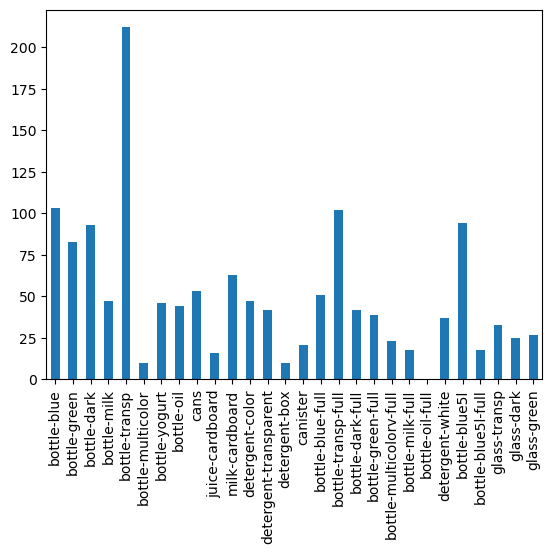

In [133]:
# plot bar graph for 2nd to 29th columns
df.iloc[:,1:29].sum().plot(kind='bar')

<Axes: ylabel='None'>

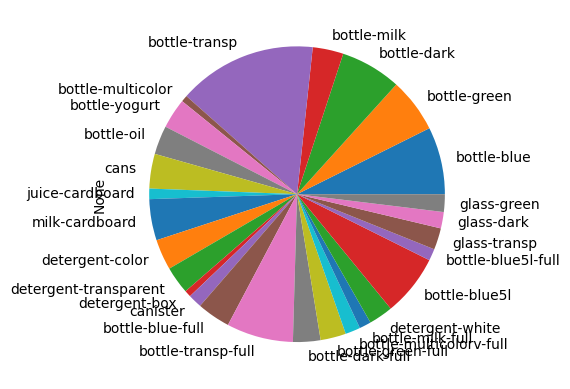

In [134]:
# generate a pie chart with the categories as labels and the number of occurences as values
df.iloc[:,1:29].sum().plot.pie()

In [146]:
# Area wise data generation
df = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise_final_Data.csv')
for i in areas:
    df1 = df[df['area'] == i]
    df1.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise data\\'+i+'.csv', index=False)

# Area wise data visualization

In [135]:
df1 = df.groupby('area').sum()
df1

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
area,,,,,,,,,,,,,,,,,,,,,
Ashram Road,4.0,3.0,7.0,1.0,8.0,1.0,7.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,8.0,2.0,4.0,2.0,0.0
Bopal,4.0,5.0,7.0,4.0,6.0,0.0,3.0,1.0,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,2.0
C.G. Road,6.0,3.0,4.0,2.0,13.0,1.0,1.0,0.0,5.0,2.0,...,2.0,1.0,1.0,0.0,2.0,7.0,0.0,3.0,3.0,0.0
Commerce,5.0,4.0,3.0,3.0,13.0,0.0,0.0,2.0,2.0,0.0,...,3.0,1.0,2.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0
Danilimda,3.0,8.0,6.0,2.0,8.0,1.0,3.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0
Dharnidhar,11.0,4.0,5.0,1.0,11.0,0.0,4.0,3.0,3.0,1.0,...,3.0,1.0,2.0,0.0,4.0,8.0,0.0,3.0,0.0,2.0
Gota,3.0,1.0,4.0,4.0,7.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
Naranpura,9.0,6.0,5.0,3.0,18.0,2.0,3.0,5.0,7.0,3.0,...,2.0,3.0,1.0,0.0,1.0,9.0,1.0,4.0,4.0,5.0
Navrangpura,10.0,5.0,12.0,5.0,17.0,0.0,3.0,1.0,3.0,0.0,...,2.0,3.0,1.0,0.0,2.0,11.0,2.0,1.0,1.0,2.0


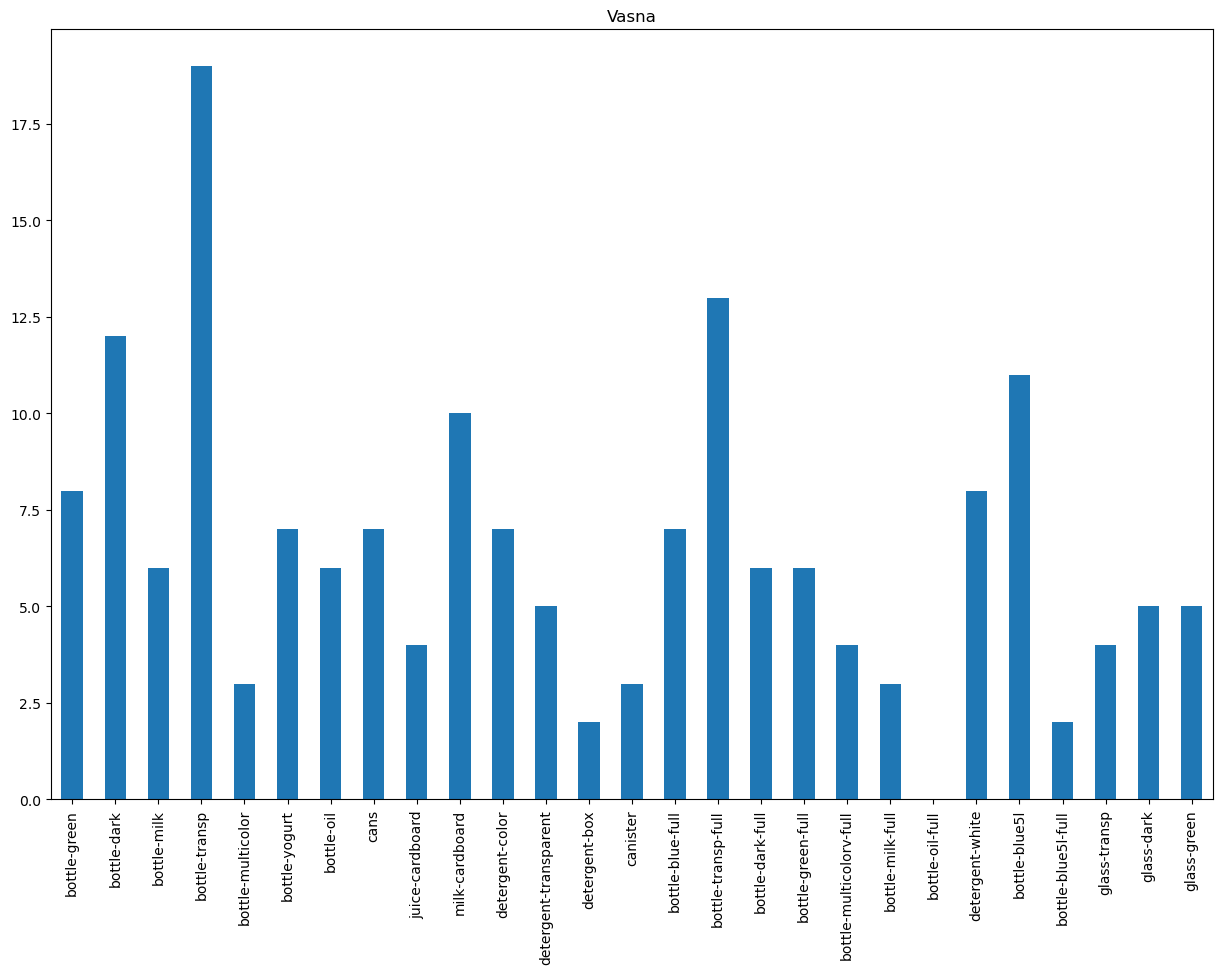

In [140]:
# now plot area wise bar graph - diff graph for each area
for i in range(len(df1)):
    df1.iloc[i,1:29].plot(kind='bar', figsize=(15,10))   
    plt.title(df1.index[i])
    # save the plot
    plt.savefig('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise graphs\\Bar Graph\\'+df1.index[i]+'.png')

In [143]:
# now plot area wise bar graph - diff graph for each area
for i in range(len(df1)):
    df1.iloc[i,1:29].plot.pie()   
    plt.title(df1.index[i])
    # save the plot
    plt.savefig('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise graphs\\Pie Chart\\'+df1.index[i]+'.png')
    # now remove the plot
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [144]:
# generate frequent itemsets
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 

In [147]:
df2 = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\final_Data.csv')
df3 = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise_final_Data.csv')

In [150]:
df2

,Image Name,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
0,Monitoring_photo2_04-Mar_00-47-42.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Monitoring_photo_04-Mar_08-36-50.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Monitoring_photo_2_test_25-Mar_11-09-46.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Monitoring_photo_2_test_25-Mar_11-11-15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Monitoring_photo_2_test_25-Mar_11-11-23.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Seldom_img_21-Apr_22-35-59.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,Seldom_img_21-Apr_22-36-56.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519,Seldom_img_21-Apr_22-58-08.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
520,Seldom_img_21-Apr_23-12-33.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Apriori doesnt require count - it only wants whether item present or not - hence, converting numerical data to boolean values

In [151]:
df2.iloc[:,1:] = df2.iloc[:,1:].astype(bool)
df2

,Image Name,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
0,Monitoring_photo2_04-Mar_00-47-42.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Monitoring_photo_04-Mar_08-36-50.jpg,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Monitoring_photo_2_test_25-Mar_11-09-46.jpg,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Monitoring_photo_2_test_25-Mar_11-11-15.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Monitoring_photo_2_test_25-Mar_11-11-23.jpg,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Seldom_img_21-Apr_22-35-59.jpg,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
518,Seldom_img_21-Apr_22-36-56.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
519,Seldom_img_21-Apr_22-58-08.jpg,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
520,Seldom_img_21-Apr_23-12-33.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [152]:
df2['area'] = df3['area']
df2

,Image Name,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,...,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green,area
0,Monitoring_photo2_04-Mar_00-47-42.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Gota
1,Monitoring_photo_04-Mar_08-36-50.jpg,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Paldi
2,Monitoring_photo_2_test_25-Mar_11-09-46.jpg,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Paldi
3,Monitoring_photo_2_test_25-Mar_11-11-15.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Commerce
4,Monitoring_photo_2_test_25-Mar_11-11-23.jpg,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,Naranpura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Seldom_img_21-Apr_22-35-59.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Vasna
518,Seldom_img_21-Apr_22-36-56.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Shilaj
519,Seldom_img_21-Apr_22-58-08.jpg,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,Ranna Park
520,Seldom_img_21-Apr_23-12-33.jpg,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,C.G. Road


In [153]:
df2.to_csv('Aprioridata.csv', index=False)

# Data Mining Analysis

In [252]:
X = pd.read_csv("Aprioridata.csv")
Y = X.groupby(["area"]).sum()
print(Y)

              bottle-blue  bottle-green  bottle-dark  bottle-milk  \
area                                                                
Ashram Road             3             3            3            1   
Bopal                   3             4            6            4   
C.G. Road               4             2            3            2   
Commerce                3             3            3            3   
Danilimda               2             7            5            2   
Dharnidhar              8             3            5            1   
Gota                    3             1            3            4   
Naranpura               5             5            4            3   
Navrangpura             6             2            9            4   
Nehrunagar              4             4            3            5   
Paldi                   3             6            3            1   
Ranna Park              5             7            8            2   
Science City            4         

# 1) Applying KMeans Clustering to identify the similar areas

In [253]:
from sklearn.cluster import KMeans

In [254]:
n_clusters = 3

c:\Users\DEVANSH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEVANSH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


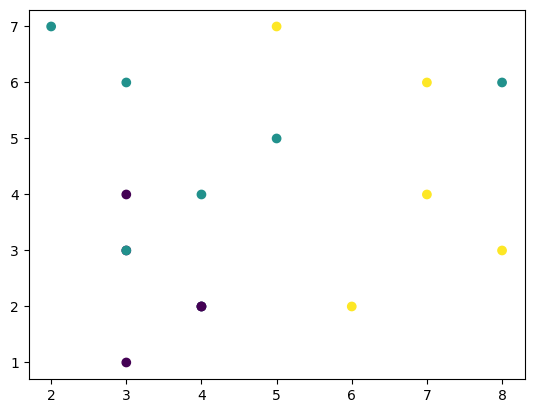

In [255]:
km = KMeans(n_clusters)
Y_predicted = km.fit_predict(Y)

import matplotlib.pyplot as plt
# plt.scatter(y[:, 0], y[:, 1], c=y_predicted)
plt.scatter(Y.iloc[:,0],Y.iloc[:, 1],c=Y_predicted)
plt.show()

[[        3.4         2.4         3.2         2.8           4         0.2           3         1.8         1.4         0.6         2.4         1.6         1.8         0.4         0.8         1.8         3.2         1.6           1         0.6         0.4           0         1.2         2.8         1.2         1.4
          0.8           1]
 [     4.1429      4.7143      3.8571      2.4286      8.2857     0.71429      1.5714      2.1429      3.8571      1.2857           4      1.7143      1.7143     0.71429      1.1429      1.7143           5      1.4286           2      1.2857      1.1429           0      1.5714      3.5714     0.85714      1.5714
       1.8571      1.1429]
 [        6.6         4.4         6.2         2.2         8.4         0.8         3.6         2.4           3         0.8         3.4         4.8         3.2         0.6         1.6           5           6         3.4         3.2         2.2         1.4           0         3.8         4.6           1           2
    

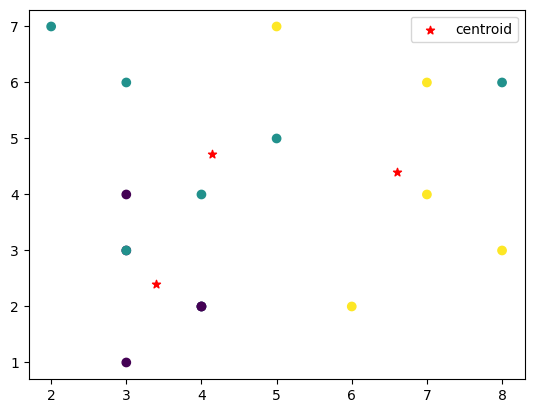

In [256]:
# print cluster centers
print(km.cluster_centers_)
# plot the cluster centers
plt.scatter(Y.iloc[:,0],Y.iloc[:, 1],c=Y_predicted)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*',label='centroid')
plt.legend()
plt.show()

# Similarity Matrix of each area

In [257]:
from sklearn.metrics import pairwise_distances
print(pairwise_distances(Y, metric='cosine'))

[[          0     0.23333     0.24116     0.30587     0.25745     0.16216     0.45848      0.2977     0.21727     0.33744     0.18756     0.25681     0.23979     0.18743     0.24648     0.23073     0.24541]
 [    0.23333           0     0.28174     0.27287     0.19421     0.25078     0.33156     0.22971     0.22841     0.20969     0.27328     0.24059     0.30215     0.32832     0.25685     0.15912      0.2354]
 [    0.24116     0.28174  3.3307e-16     0.15574     0.19065     0.11905     0.34531     0.12001      0.1961    0.093943     0.13566     0.14428     0.23801     0.19482     0.22563     0.25349     0.13115]
 [    0.30587     0.27287     0.15574  1.1102e-16     0.16536     0.17065     0.21084      0.1632     0.15311     0.18079     0.20891     0.15017     0.22267     0.17837     0.11041     0.23888     0.17006]
 [    0.25745     0.19421     0.19065     0.16536           0     0.15101     0.34755     0.15304     0.21137     0.21687     0.19261     0.14721     0.25307     0.23903   

In [258]:
# print all areas of each cluster
for i in range(n_clusters):
    print("\nCluster ", i)
    for j in range(len(Y_predicted)):
        if Y_predicted[j] == i:
            print(Y.index[j])


Cluster  0
Ashram Road
Bopal
Gota
Science City
Vasna

Cluster  1
C.G. Road
Commerce
Danilimda
Naranpura
Nehrunagar
Paldi
Sindhubhavan

Cluster  2
Dharnidhar
Navrangpura
Ranna Park
Shilaj
Vaishnodevi


# Now, analyzing wastes in each cluster

In [259]:
Y['Cluster'] = Y_predicted
Y

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green,Cluster
area,,,,,,,,,,,,,,,,,,,,,
Ashram Road,3,3,3,1,4,1,7,1,1,0,...,0,0,0,2,6,2,3,2,0,0
Bopal,3,4,6,4,3,0,3,1,1,2,...,0,0,0,0,3,1,2,0,2,0
C.G. Road,4,2,3,2,8,1,1,0,4,2,...,1,1,0,2,4,0,2,3,0,1
Commerce,3,3,3,3,9,0,0,2,2,0,...,1,2,0,1,3,1,1,0,0,1
Danilimda,2,7,5,2,7,1,3,0,4,0,...,0,0,0,1,1,1,1,0,3,1
Dharnidhar,8,3,5,1,8,0,4,2,3,1,...,1,2,0,4,4,0,2,0,2,2
Gota,3,1,3,4,6,0,0,2,0,0,...,0,0,0,1,0,1,0,1,1,0
Naranpura,5,5,4,3,10,2,3,3,7,3,...,3,1,0,1,3,1,4,4,4,1
Navrangpura,6,2,9,4,9,0,3,1,3,0,...,3,1,0,2,7,2,1,1,2,2


In [260]:
Y = Y.groupby(["Cluster"]).sum()
print(Y)

         bottle-blue  bottle-green  bottle-dark  bottle-milk  bottle-transp  \
Cluster                                                                       
0                 17            12           16           14             20   
1                 29            33           27           17             58   
2                 33            22           31           11             42   

         bottle-multicolor  bottle-yogurt  bottle-oil  cans  juice-cardboard  \
Cluster                                                                        
0                        1             15           9     7                3   
1                        5             11          15    27                9   
2                        4             18          12    15                4   

         ...  bottle-green-full  bottle-multicolorv-full  bottle-milk-full  \
Cluster  ...                                                                 
0        ...                  5                

# Bar Graph for each Cluster

In [287]:
for i in range(n_clusters):
    Y.iloc[i,0:28].plot(kind='bar', figsize=(15,10))   
    plt.title('Cluster '+str(i))
    plt.savefig('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Clusterwise Graphs\\Bar Graphs\\Cluster '+str(i)+'.png')
    plt.clf()

<Figure size 1500x1000 with 0 Axes>

# pie chart for each cluster

In [288]:
for i in range(n_clusters):
    Y.iloc[i,0:28].plot.pie()   
    plt.title('Cluster '+str(i))
    plt.savefig('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Clusterwise Graphs\\Pie Chart\\Cluster '+str(i)+'.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(n_clusters):
    print("\nCluster ", i)
    print(Y.iloc[i,:]/Y.iloc[i,:].sum())

finding %wise waste generated in each area

In [261]:
a = Y.iloc[0,:].to_numpy()
b = Y.iloc[1,:].to_numpy()
c = Y.iloc[2,:].to_numpy()
print(a.shape)

(28,)


In [262]:
a=(a/a.sum())*100
b=(b/b.sum())*100
c=(c/c.sum())*100

In [263]:
Y.loc[0]=a
Y.loc[1]=b
Y.loc[2]=c
Y

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
Cluster,,,,,,,,,,,,,,,,,,,,,
0,7.264957,5.128205,6.837607,5.982906,8.547009,0.427350,6.410256,3.846154,2.991453,1.282051,...,2.136752,1.282051,0.854701,0,2.564103,5.982906,2.564103,2.991453,1.709402,2.136752
1,6.331878,7.205240,5.895197,3.711790,12.663755,1.091703,2.401747,3.275109,5.895197,1.965066,...,3.056769,1.965066,1.746725,0,2.401747,5.458515,1.310044,2.401747,2.838428,1.746725
2,7.482993,4.988662,7.029478,2.494331,9.523810,0.907029,4.081633,2.721088,3.401361,0.907029,...,3.628118,2.494331,1.587302,0,4.308390,5.215420,1.133787,2.267574,1.360544,2.721088


In [266]:
clusters = {}
for i in range(n_clusters):
    clusters[i] = Y.iloc[i,:].to_numpy()
clusters

{0: array([      7.265,      5.1282,      6.8376,      5.9829,       8.547,     0.42735,      6.4103,      3.8462,      2.9915,      1.2821,      5.1282,      3.4188,      3.8462,      0.8547,      1.7094,      3.8462,      6.8376,      3.4188,      2.1368,      1.2821,      0.8547,           0,      2.5641,      5.9829,
             2.5641,      2.9915,      1.7094,      2.1368]),
 1: array([     6.3319,      7.2052,      5.8952,      3.7118,      12.664,      1.0917,      2.4017,      3.2751,      5.8952,      1.9651,      6.1135,      2.6201,      2.6201,      1.0917,      1.7467,      2.6201,      7.6419,      2.1834,      3.0568,      1.9651,      1.7467,           0,      2.4017,      5.4585,
               1.31,      2.4017,      2.8384,      1.7467]),
 2: array([      7.483,      4.9887,      7.0295,      2.4943,      9.5238,     0.90703,      4.0816,      2.7211,      3.4014,     0.90703,      3.8549,      5.4422,      3.6281,     0.68027,      1.8141,      5.6689,      6.8027

In [270]:
max_columns = Y.idxmax(axis=1)
print(max_columns)
# replace cluster number with list of areas in that cluster
Y['Cluster'] = max_columns
Y

Cluster
0    bottle-transp
1    bottle-transp
2    bottle-transp
dtype: object


,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,7.264957,5.128205,6.837607,5.982906,8.547009,0.427350,6.410256,3.846154,2.991453,1.282051,...,1.282051,0.854701,0,2.564103,5.982906,2.564103,2.991453,1.709402,2.136752,bottle-transp
1,6.331878,7.205240,5.895197,3.711790,12.663755,1.091703,2.401747,3.275109,5.895197,1.965066,...,1.965066,1.746725,0,2.401747,5.458515,1.310044,2.401747,2.838428,1.746725,bottle-transp
2,7.482993,4.988662,7.029478,2.494331,9.523810,0.907029,4.081633,2.721088,3.401361,0.907029,...,2.494331,1.587302,0,4.308390,5.215420,1.133787,2.267574,1.360544,2.721088,bottle-transp


In [271]:
# can add code for top-5 also

In [280]:
# find which area generates each waste the most
df = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise_final_Data.csv')
df

,Image Name,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,...,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green,area
0,Monitoring_photo2_04-Mar_00-47-42.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gota
1,Monitoring_photo_04-Mar_08-36-50.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paldi
2,Monitoring_photo_2_test_25-Mar_11-09-46.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paldi
3,Monitoring_photo_2_test_25-Mar_11-11-15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Commerce
4,Monitoring_photo_2_test_25-Mar_11-11-23.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Naranpura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Seldom_img_21-Apr_22-35-59.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vasna
518,Seldom_img_21-Apr_22-36-56.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shilaj
519,Seldom_img_21-Apr_22-58-08.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Ranna Park
520,Seldom_img_21-Apr_23-12-33.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C.G. Road


In [281]:
df1 = df.groupby('area').sum()
df1

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
area,,,,,,,,,,,,,,,,,,,,,
Ashram Road,4.0,3.0,7.0,1.0,8.0,1.0,7.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,8.0,2.0,4.0,2.0,0.0
Bopal,4.0,5.0,7.0,4.0,6.0,0.0,3.0,1.0,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,2.0
C.G. Road,6.0,3.0,4.0,2.0,13.0,1.0,1.0,0.0,5.0,2.0,...,2.0,1.0,1.0,0.0,2.0,7.0,0.0,3.0,3.0,0.0
Commerce,5.0,4.0,3.0,3.0,13.0,0.0,0.0,2.0,2.0,0.0,...,3.0,1.0,2.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0
Danilimda,3.0,8.0,6.0,2.0,8.0,1.0,3.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0
Dharnidhar,11.0,4.0,5.0,1.0,11.0,0.0,4.0,3.0,3.0,1.0,...,3.0,1.0,2.0,0.0,4.0,8.0,0.0,3.0,0.0,2.0
Gota,3.0,1.0,4.0,4.0,7.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
Naranpura,9.0,6.0,5.0,3.0,18.0,2.0,3.0,5.0,7.0,3.0,...,2.0,3.0,1.0,0.0,1.0,9.0,1.0,4.0,4.0,5.0
Navrangpura,10.0,5.0,12.0,5.0,17.0,0.0,3.0,1.0,3.0,0.0,...,2.0,3.0,1.0,0.0,2.0,11.0,2.0,1.0,1.0,2.0


finding waste-wise, which area contributes the most

In [286]:
for i in range(1,28):
    df2 = df1.sort_values(by=df1.columns[i], ascending=False)
    print(df2.columns[i] + ' = ' + df2.index[0])

bottle-green = Vaishnodevi
bottle-dark = Navrangpura
bottle-milk = Nehrunagar
bottle-transp = Shilaj
bottle-multicolor = Ranna Park
bottle-yogurt = Ashram Road
bottle-oil = Vaishnodevi
cans = Naranpura
juice-cardboard = Nehrunagar
milk-cardboard = Paldi
detergent-color = Navrangpura
detergent-transparent = Ranna Park
detergent-box = Naranpura
canister = Vasna
bottle-blue-full = Shilaj
bottle-transp-full = Dharnidhar
bottle-dark-full = Shilaj
bottle-green-full = Vaishnodevi
bottle-multicolorv-full = Shilaj
bottle-milk-full = Nehrunagar
bottle-oil-full = Ashram Road
detergent-white = Ranna Park
bottle-blue5l = Navrangpura
bottle-blue5l-full = Ashram Road
glass-transp = Ashram Road
glass-dark = Paldi
glass-green = Naranpura


# Apriori

In [206]:
df2 = pd.read_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Aprioridata.csv')
df = df2.iloc[:,1:29]
print(df.head())

   bottle-blue  bottle-green  bottle-dark  bottle-milk  bottle-transp  \
0        False         False        False        False          False   
1        False          True        False        False          False   
2        False         False        False        False           True   
3        False         False        False        False          False   
4        False         False        False        False          False   

   bottle-multicolor  bottle-yogurt  bottle-oil   cans  juice-cardboard  ...  \
0              False          False       False  False            False  ...   
1              False          False       False  False            False  ...   
2              False          False       False  False            False  ...   
3              False          False       False  False            False  ...   
4              False          False       False   True            False  ...   

   bottle-green-full  bottle-multicolorv-full  bottle-milk-full  \
0            

# Frequent Itemset for entire dataset

In [158]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.to_csv('frequent_itemsets_overall.csv', index=False)

# Association Rules Generation for entire dataset

In [162]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0)
rules = rules.sort_values(by='confidence', ascending=False)
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [165]:
path = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise data\\'
for i in os.listdir(path):
    df = pd.read_csv(path+i)
    df1 = df.iloc[:,1:29]
    df1 = df1.astype(bool)
    frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    frequent_itemsets.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise frequent itemsets\\'+i+'.csv', index=False)
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
    rules = rules.sort_values(by='confidence', ascending=False)
    rules.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise Rules\\'+i+'.csv', index=False)

In [168]:
# now apply partitioning method and combine all frequent itemsets
path = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise frequent itemsets\\'
df = pd.read_csv(path+os.listdir(path)[0])
df

,support,itemsets
0,0.28,frozenset({'bottle-yogurt'})
1,0.24,frozenset({'bottle-blue5l'})
2,0.20,frozenset({'bottle-transp-full'})
3,0.16,"frozenset({'bottle-blue5l', 'bottle-transp'})"
4,0.16,frozenset({'bottle-transp'})
5,0.16,frozenset({'milk-cardboard'})
6,0.16,frozenset({'bottle-dark-full'})
7,0.12,frozenset({'bottle-blue'})
8,0.12,"frozenset({'bottle-dark', 'bottle-blue5l', 'bo..."
9,0.12,"frozenset({'bottle-blue5l', 'bottle-dark-full'})"


In [169]:
for i in os.listdir(path)[1:]:
    df1 = pd.read_csv(path+i)
    df = pd.concat([df, df1], axis=0)
df

,support,itemsets
0,0.28,frozenset({'bottle-yogurt'})
1,0.24,frozenset({'bottle-blue5l'})
2,0.20,frozenset({'bottle-transp-full'})
3,0.16,"frozenset({'bottle-blue5l', 'bottle-transp'})"
4,0.16,frozenset({'bottle-transp'})
...,...,...
4,0.16,frozenset({'bottle-transp-full'})
5,0.12,frozenset({'bottle-dark'})
6,0.12,frozenset({'bottle-blue5l'})
7,0.12,"frozenset({'bottle-blue', 'bottle-transp'})"


In [170]:
df.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise frequent itemsets\\combined_frequent_itemsets.csv', index=False)

In [185]:
import csv
from collections import Counter

# Read the frequent itemsets from CSV
with open('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Areawise frequent itemsets\\combined_frequent_itemsets.csv', 'r') as f:
    reader = csv.reader(f)
    freq_itemsets = list(reader)

# Count the occurrences of each frequent itemset
freq_itemset_counts = Counter(tuple(itemset) for itemset in freq_itemsets)
l = []
# Print the frequent itemset counts
for itemset, count in freq_itemset_counts.items():
    if count>=1:
        s = itemset[1]
        s = s.lstrip('frozenset({')
        s = s.rstrip('})')
        if s in l:
            continue
        else:
            l.append(s)

In [187]:
from mlxtend.preprocessing import TransactionEncoder
t = TransactionEncoder()
data = t.fit(l).transform(l)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
1,False,True,False,True,False,False,True,False,False,True,...,False,True,False,True,False,True,True,False,False,True
2,False,True,False,True,True,False,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,True,True,False,False,True,...,True,True,True,True,True,True,True,False,False,False
4,True,True,True,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,True,True,True,True,False,True,True,False,False,True,...,True,True,True,True,True,True,True,False,False,False
116,True,True,True,True,False,True,True,False,True,True,...,True,True,False,True,False,True,True,False,False,False
117,True,True,True,True,False,True,True,False,False,True,...,True,True,True,True,True,True,True,False,False,False
118,True,True,True,True,False,True,True,False,True,True,...,True,True,True,True,True,True,True,False,False,False


In [189]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.8, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print(frequent_itemsets)

     support        itemsets
0   0.991667             (1)
1   0.975000             (3)
8   0.975000          (1, 3)
3   0.966667             (9)
10  0.958333          (1, 9)
..       ...             ...
89  0.800000  (1, 3, 21, 23)
62  0.800000     (16, 3, 21)
86  0.800000  (16, 1, 3, 21)
65  0.800000     (3, 21, 23)
75  0.800000     (9, 21, 23)

[145 rows x 2 columns]


In [ ]:
frequent_itemsets = []
for partition in partitioned_data:
    itemsets = generate_itemsets(partition)
    frequent_itemsets.append(get_frequent_itemsets(itemsets, min_support))

# Count the frequent itemsets
itemset_counts = {}
for itemsets in frequent_itemsets:
    for itemset in itemsets:
        itemset_counts[itemset] = itemset_counts.get(itemset, 0) + 1

In [48]:
for i in names:
    df3 = pd.read_csv(i+'.csv')
    # print(df3.head)
    frequent_itemsets = apriori(df3, min_support=0.8, use_colnames=True)
    print("hi")
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    # print(frequent_itemsets)
    with open(i+'.txt', 'a') as f:
        f.write(str(frequent_itemsets))

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [50]:
df3 = pd.read_csv('dataPaldi.csv')
df3.head()

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
0,True,True,True,False,False,False,False,True,True,True,...,False,True,True,True,True,True,True,True,False,False
1,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
2,True,True,False,True,False,False,True,False,True,True,...,False,True,True,True,True,False,True,False,False,True
3,True,True,True,False,True,False,False,False,True,False,...,False,True,False,True,True,True,False,True,True,True


In [51]:
frequent_itemsets = apriori(df3, min_support=0.5, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.to_csv('frequent_itemsets_paldi.csv', index=False)

In [18]:
# generate support count of each item
frequent_itemsets = apriori(df1, min_support=0.5, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

,support,itemsets
10,0.75,(milk-cardboard)
26,0.74,(glass-dark)
12,0.73,(detergent-transparent)
2,0.70,(bottle-dark)
0,0.69,(bottle-blue)
...,...,...
51,0.50,"(milk-cardboard, detergent-color)"
50,0.50,"(glass-dark, juice-cardboard)"
48,0.50,"(glass-dark, cans)"
46,0.50,"(detergent-transparent, cans)"


In [22]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)
rules = rules.sort_values(by='confidence', ascending=False)
print(rules)

             antecedents              consequents  antecedent support  \
44  (bottle-transp-full)         (milk-cardboard)                0.61   
55   (bottle-green-full)             (glass-dark)                0.62   
27         (bottle-milk)         (milk-cardboard)                0.64   
2         (bottle-green)         (milk-cardboard)                0.67   
21    (bottle-milk-full)  (detergent-transparent)                0.66   
..                   ...                      ...                 ...   
80          (glass-dark)                   (cans)                0.74   
84          (glass-dark)          (bottle-blue5l)                0.74   
75      (milk-cardboard)       (bottle-blue-full)                0.75   
70      (milk-cardboard)       (bottle-dark-full)                0.75   
76      (milk-cardboard)        (detergent-color)                0.75   

    consequent support  support  confidence      lift  leverage  conviction  \
44                0.75     0.51    0.836066 